## Pronostico de las acciones de Walmex
## Lizbeth Ramos Saucedo 1885423

El periodo de tiempo elegido fue de los ultimos 10 años ya que busco tener información de un lapso de tiempo largo para una mejor predicción y además en este periodo hubo años en los que ocurrieron cosas importantes como modificaciones en 2010 de la reforma laboral donde se buscaba ser mas flexible con los empleados y en 2019 el covid-19.

Estos son datos importantes para saber como se comporto la accion de walmex ante estos cambios.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
walmex= pd.read_excel('wmx.xlsx')

In [3]:
walmex = walmex.dropna()

In [4]:
walmex

,Fecha,Walmex
0,2013-01-02,32.099808
1,2013-01-03,32.245197
2,2013-01-04,31.893209
3,2013-01-07,32.245197
4,2013-01-08,32.023281
...,...,...
2593,2023-04-28,72.470001
2594,2023-05-02,72.250000
2595,2023-05-03,71.910004
2596,2023-05-04,71.800003


In [5]:
#DECLARAR LA VARIABLE DEL TIEMPO
walmex.loc[:, 'Fecha'] = pd.to_datetime(walmex['Fecha'], format='%d/%m/%Y')


In [6]:
walmex= walmex.set_index('Fecha')

In [7]:
walmex

,Walmex
Fecha,
2013-01-02,32.099808
2013-01-03,32.245197
2013-01-04,31.893209
2013-01-07,32.245197
2013-01-08,32.023281
...,...
2023-04-28,72.470001
2023-05-02,72.250000
2023-05-03,71.910004


In [8]:
# Asignar una frecuencia 
#Frecuencia dias habiles (bussiness days)

walmex= walmex.asfreq('B')

In [9]:
walmex.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27',
               '2023-04-28', '2023-05-01', '2023-05-02', '2023-05-03',
               '2023-05-04', '2023-05-05'],
              dtype='datetime64[ns]', name='Fecha', length=2698, freq='B')

In [10]:
walmex

,Walmex
Fecha,
2013-01-02,32.099808
2013-01-03,32.245197
2013-01-04,31.893209
2013-01-07,32.245197
2013-01-08,32.023281
...,...
2023-05-01,NaN
2023-05-02,72.250000
2023-05-03,71.910004


In [11]:
walmex['Walmex']= walmex ['Walmex'].ffill()

In [12]:
walmex

,Walmex
Fecha,
2013-01-02,32.099808
2013-01-03,32.245197
2013-01-04,31.893209
2013-01-07,32.245197
2013-01-08,32.023281
...,...
2023-05-01,72.470001
2023-05-02,72.250000
2023-05-03,71.910004


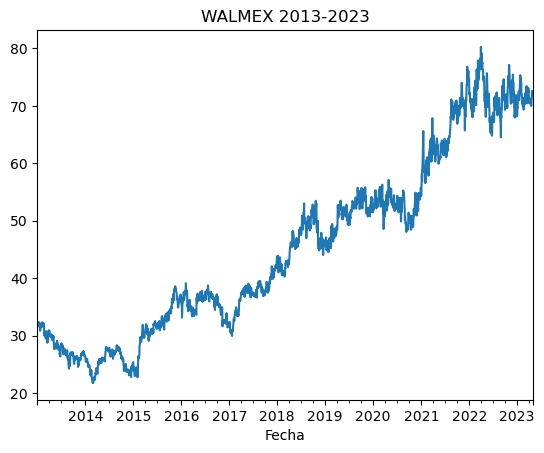

In [13]:
walmex['Walmex'].plot()
plt.title('WALMEX 2013-2023');

muestra tendencia alcista,
parece una caminata aleatoria con tendencia positiva (NO estacionaria)

1. PROBAR SI LA SERIE ES ESTACIONARIA 

In [14]:
#Realizamos la prueba de raiz unitaria
ADF_test1=adfuller(walmex['Walmex'])

#Ho: Serie No Estacionaria
#Ha: Serie Estacionaria

alpha=0.05
pvalue=ADF_test1[1]
if pvalue<alpha:
  print('Rechazamos Ho, Serie Estacionaria')
else:
  print('No rechazamos Ho, Serie No Estacionaria')

No rechazamos Ho, Serie No Estacionaria


Como la serie no estacionaria tenemos que hacerla estacionaria aplicando primeras diferencias $\Delta Y_t=Y_t - Y_{t-1}$

In [15]:
walmex['walmex_diferenciado']=walmex['Walmex'].diff()
walmex

,Walmex,walmex_diferenciado
Fecha,,
2013-01-02,32.099808,NaN
2013-01-03,32.245197,0.145389
2013-01-04,31.893209,-0.351988
2013-01-07,32.245197,0.351988
2013-01-08,32.023281,-0.221916
...,...,...
2023-05-01,72.470001,0.000000
2023-05-02,72.250000,-0.220001
2023-05-03,71.910004,-0.339996


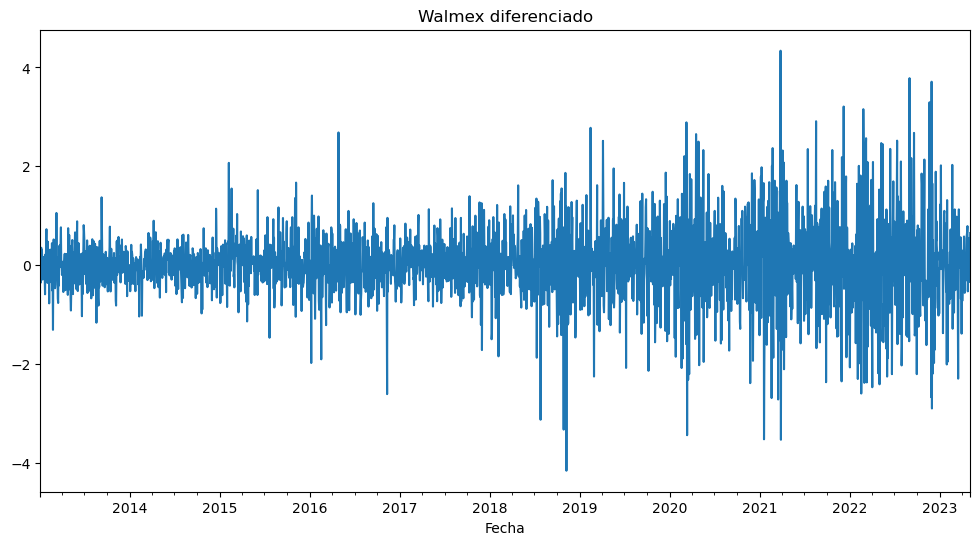

In [16]:
# graficar walmex diferenciado
walmex['walmex_diferenciado'].plot(figsize=(12,6))
plt.title('Walmex diferenciado')
plt.show()

In [17]:
#comprobar si la nueva serie es estacionaria
ADF_test2=adfuller(walmex['walmex_diferenciado'].dropna())

#Ho: Serie No Estacionaria
#Ha: Serie Estacionaria

alpha=0.05
pvalue=ADF_test2[1]
if pvalue<alpha:
  print('Rechazamos Ho, Serie Estacionaria')
else:
  print('No rechazamos Ho, Serie No Estacionaria')

Rechazamos Ho, Serie Estacionaria


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


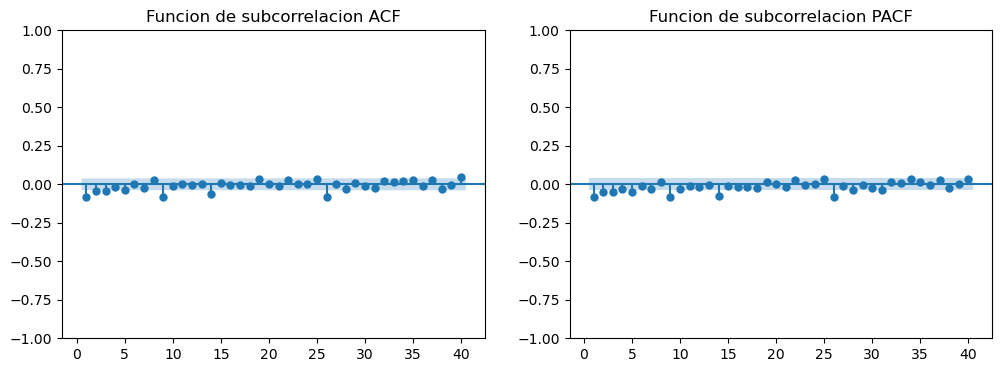

In [18]:
#ya que la serie es estacionaria se puede determinar que tipo de proceso es
fig,ax=plt.subplots(1,2,figsize=(12,4))
plot_acf(walmex['walmex_diferenciado'].dropna(),zero=False,lags=40, ax=ax[0],title='Funcion de subcorrelacion ACF')
ax[0].set_ylim(-1,1)
plot_pacf(walmex['walmex_diferenciado'].dropna(),zero=False, lags=40, ax=ax[1],title='Funcion de subcorrelacion PACF')
ax[1].set_ylim(-1,1)
plt.show()

 se aprecia que es estacional 

In [19]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(walmex['Walmex'].dropna(), order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

 

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 5


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 5


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 6


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 4


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
ic.sort_values('AIC', ascending=True).head(3)

,,AIC,BIC
AR,MA,,
5,5,6045.466117,6110.364965
6,3,6047.322496,6106.321450
3,5,6047.722679,6100.821737


ARIMA(p,I,q)


p es el orden AR


q es el orden MA


I es el grado de integracion, cuantas veces aplicamos primeras diferencias a la series


De acuerdo con el AIC walmex es un ARIMA (5,1,5)

In [22]:
# estimar el verdadero modelo
modelo_final = ARIMA (walmex['Walmex'], order=(5,1,5))
resultadof = modelo_final.fit()
print(resultadof.summary())

C:\Users\sauce\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 Walmex   No. Observations:                 2698
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3011.733
Date:                Tue, 09 May 2023   AIC                           6045.466
Time:                        23:28:29   BIC                           6110.365
Sample:                    01-02-2013   HQIC                          6068.937
                         - 05-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8199      0.048    -17.130      0.000      -0.914      -0.726
ar.L2         -0.3437      0.063     -5.416      0.000      -0.468      -0.219
ar.L3         -0.1062      0.063     -1.683      0.0

In [24]:
# pronóstico
resultadof.predict('2023-05-08', '2023-05-10')

2023-05-08    72.370577
2023-05-09    72.266328
2023-05-10    72.311211
Freq: B, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Fecha'>

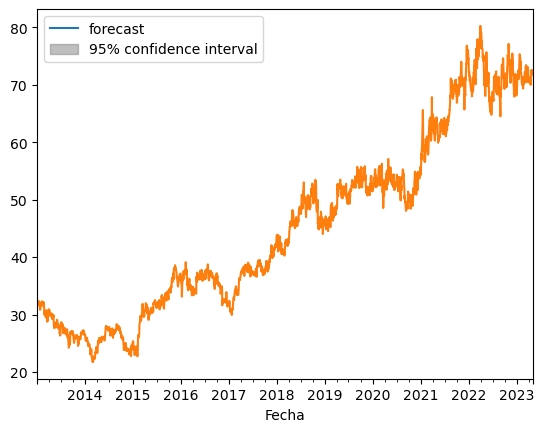

In [27]:
from statsmodels.graphics.tsaplots import plot_predict

## grafica
plot_predict(resultadof, start='2023-05-08', end='2023-05-10')
walmex['Walmex'].plot()



CONCLUSIÓN:
Mi pronóstico de precio de la acción de Walmart de México (WALMEX) es de 72.370577 para el 8 de mayo, 72.266328 para el 9 de mayo y 72.311211 para el 10 de mayo